<a href="https://colab.research.google.com/github/anastasiaperry/B-field/blob/main/Equipotentials_alvord_3_2_B_circles_fixed_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipotential Lines
The functions defined below implement the calculation and plotting of both equipotential lines (via a contour plot) and electric field lines (via a stream plot).  

## The Physics

## Electric Field

$$\vec{E}(\vec{r})=k\sum \frac{q_i}{|\vec{r}|^2}\hat{r}$$

## Electric Potential

$$V(\vec{r})=k \sum \frac{q_i}{|\vec{r}|}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#DO NOT ERASE THESE!!!!
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="xx-large")
plt.rc("axes", titlesize="xx-large")
plt.rc("figure", figsize=(10,8))

## Defining the Python Functions
The *V* function for potential and the *Efield* function for electric field take as argument the $x$ and $y$ coordinates of the test/evaluation point, and then the list of electric charges.  

The list of electric charges, *qr*, is set up so that each charge *q* in *qr* is a three-element tuple (a tuple is a finite ordered list (sequence) of elements).  For each *q* in *qr*:

  * q[0] is the charge's $x$ coordinate.
  * q[1] is the charge's $y$ coordinate.
  * q[2] is the electric charge.
  
The Coulomb constant $k$ is scaled in a way that assumes the charges will be given in units of nC.  

In [ ]:

k = (9E9) * (1E-9)    # Will yield E in units of Volts/meter, and V in Volts.
radius = 0.02         # "dead zone" to prevent calculating E or V on top of a charge
x = np.arange(-10.0,10.0,0.1)
y = np.arange(-10.0,10.0,0.1)
X,Y = np.meshgrid(x,y)

def V(q,xField,yField):
    Vr = 0.0
    rx = xField - q[0]
    ry = yField - q[1]
    r = np.array([rx,ry])
    rmag = np.linalg.norm(r)

    if (rmag >= radius):
        Vr += (k*q[2] / rmag)
        return Vr
    else:
        return 0

def PointEField(q,xField,yField):
    Ex = np.array([0.0])
    Ey = np.array([0.0])
    # Calculate the distance between the charge and the field point.
    rx = xField - q[0]
    ry = yField - q[1]
    r = np.array([rx,ry])
    rmag = np.linalg.norm(r)

    if rmag<=radius:
        return 0,0
    else:
        # Calculate the electric field's magnitude.
        Emag = k*q[2]/ rmag**2

        # Calculate the x- and y-components of the field.
        Ex = Emag * (rx / rmag)
        Ey = Emag * (ry / rmag)

        # Return the two components as the function's outputs.
        return Ex,Ey

def Plots(qr,title = ""):
    Ex = np.zeros(X.shape)
    Ey = np.zeros(X.shape)
    V_values = np.zeros(X.shape)
    u = np.zeros(X.shape)
    v = np.zeros(X.shape)
    w = np.zeros(X.shape)

    for q in qr:
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Ex[i,j] = Ex[i,j] + PointEField(q,X[i,j],Y[i,j])[0]
                Ey[i,j] = Ey[i,j] + PointEField(q,X[i,j],Y[i,j])[1]
                V_values[i,j] = V_values[i,j] + V(q,X[i,j],Y[i,j])

                u = Ex
                v = Ey
                w = V_values

    plt.figure(figsize=(10,10))
    equipot = plt.contour(X,Y,w,levels=np.linspace(0.5*np.min(w), 0.5*np.max(w), 20))
    plt.contour(X,Y,w, levels=[0.0], linewidths=4.0)
    plt.streamplot(X,Y,u,v, color="black",density=2)
    plt.colorbar(equipot)
    plt.xlim(-5.0, 5.0)
    plt.ylim(-5.0, 5.0)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title)
    plt.show()

The next function defines the plotting function.  It takes as argument the list of point charges *qr*.  

It plots

  * A contour plot for the electric potential.
  * An extra thick contour line at V=0, for highlighting purposes.
  * A stream plot for the electric field.

## Exercise 1 + 2
In this example, we

  1. Set up the list of charges *qr*.
  2. Call the plotting function, which will plot *both* the electric field lines and the equipotential lines.

/tmp/ipykernel_99/3370116496.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(X,Y,w, levels=[0.0], linewidths=4.0)


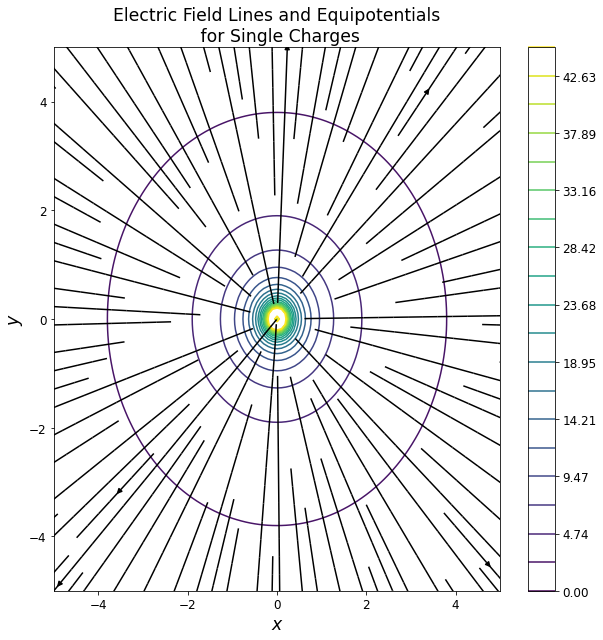

In [ ]:
qr = []
qr.append((0.0, 0.0, 1.0))
Plots(qr, title = "Electric Field Lines and Equipotentials\n for Single Charges")

### Description
Students should notice that the electric field lines "radiate" out away from the positive charge, as we would expect.  The equipotentials form spheres around the charge.  At every point, the electric field lines and the equipotentials are perpendicular to each other.  

# Exercise 3
## 1. A positive and negative charge

In [ ]:
qr = []
qr.append((1.0, 0.0, 1.0))
qr.append((-1.0, 0.0, -1.0))

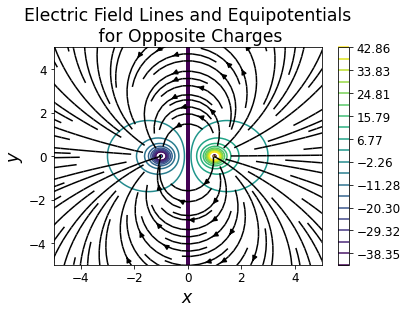

In [ ]:
Plots(qr, title = "Electric Field Lines and Equipotentials\n for Opposite Charges")

### Description
A major feature that we see is that the electric field lines point *from* the positive charge and *towards* the negative charge.  We also see a $V=0$ equipotential plane at $x=0$.  As always, the electric field lines are perpendicular to the equipotential lines.  

### Notes helpful for Exercise 4
With the $V=0$ equipotential plane at $x=0$, this pair of opposite charges reproduces the boundary conditions for Exercise 4.1.  The solution to the method of images problem can be obtained by plotting this figure only for $x>0$.  

The surface charge density induced on the conducting plate can be found from

$$ \sigma(x, y, z) = \epsilon_0 \left(\vec{E}_\mathrm{outside} - \vec{E}_\mathrm{inside}\right)\cdot \hat{n}, $$

where in this case $\hat{n} = \hat{x}$ and $\vec{E}_\mathrm{inside} = 0$.  Then, we are plotting the $x$-component of the electric field for all $y$ where $x=z=0$.  

In the plot below of $\sigma(y, z=0)$, it makes sense that most of the negative charge induced on the plate is concentrated at $y=0$, which is closest to the positive charge.

In [ ]:
# Plot of the surface charge density, for the method of images solution.
sigma = [Efield(0.0, iy, qr)[0]/(4.0*numpy.pi*k) for iy in y]
mpl.plot(y, sigma)
mpl.xlabel("$y$")
mpl.ylabel("$\sigma(y)$")
mpl.title("Induced Surface Charge Density vs. Vertical Position")

NameError: name 'Efield' is not defined

## 2. Two positive charges

<ipython-input-3-7a41bfee2d16>:7: UserWarning: No contour levels were found within the data range.
  mpl.contour(X,Y,Varr, levels=[0.0], linewidths=4.0)


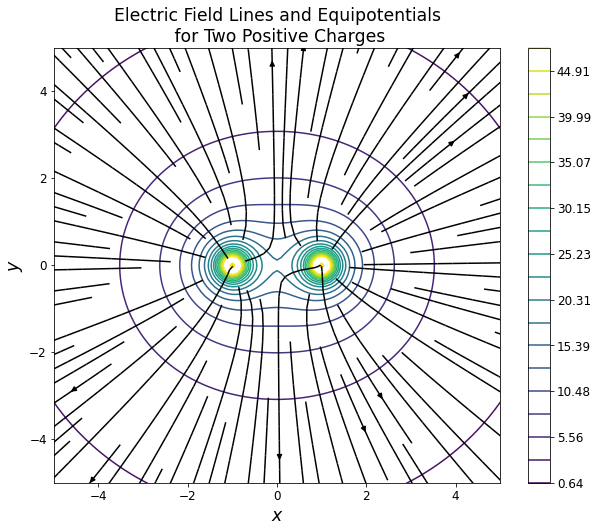

In [ ]:
qr = []
qr.append((1.0, 0.0, 1.0))
qr.append((-1.0, 0.0, 1.0))
Plots(qr, title = "Electric Field Lines and Equipotentials\n for Two Positive Charges")

### Description
With the two like charges, we see the electric field lines "steer away" from the region in between the charges.  The equipotential surfaces also form an interesting saddle region between the charges.  

Far away from the charges, the electric field lines and equipotential surfaces begin to look like those of a single point charge of $2.0$nC.  

## 3. A different positive-negative pair

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


-0.5 1.0


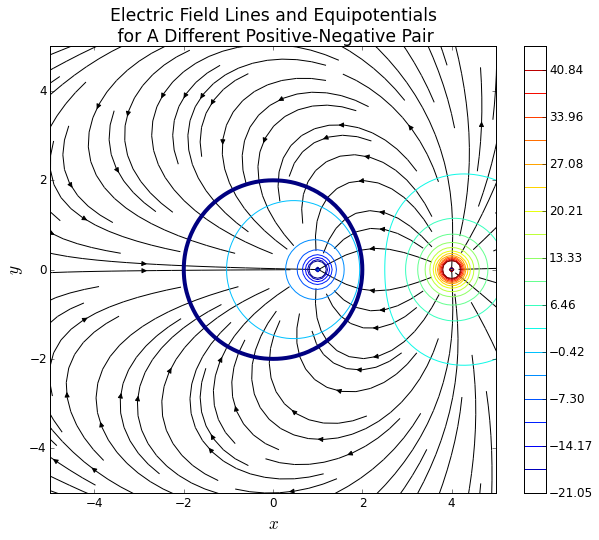

In [ ]:
qr = []
a = 4.0
q1 = 1.0
R = 2.0
qp = -q1*R/a
b = (R**2)/a
print(qp, b)
qr.append((a, 0.0, q1))
qr.append((b, 0.0, qp))
Plots(qr, title = "Electric Field Lines and Equipotentials\n for A Different Positive-Negative Pair")

### Description
This plot has many similarities to the first pair of opposite charges.  Because the positive charge is bigger in magnitude, we do see more electric field lines emanating from that charge than "go into" the negative charge.  The equipotential surfaces form interesting "bean shapes" in certain regions.  We also see a spherical $V=0$ equipotential surface.  

### Notes helpful for Exercise 4
With the $V=0$ equipotential surface forming a sphere, this pair of opposite charges reproduces the boundary conditions for Exercise 4.2.  The solution to the method of images problem can be obtained by plotting this figure only outside of the sphere.  

An interesting variation for this exercise is to provide initial charge sizes and placements that do not *exactly* reproduce the boundary conditions for Exercise 4.2.  In this way, the students can see that the pair of mismatched opposite charges produces conditions *similar* to those of Exercise 4.2, but that some adjustment is needed to reproduce the boundary conditions exactly.  Some trial-and-error adjustment may be encouraged, while accompanying this exercise with a derivation of the correct image charge size $q' = -q\frac{R}{a}$ and placement $a'=\frac{R^2}{a}$.  

## 4. Four point charges

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


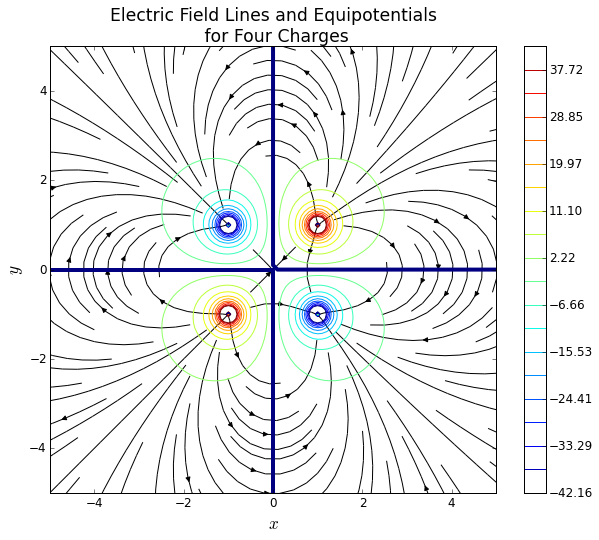

In [ ]:
qr = []
qr.append((1.0, 1.0, 1.0))
qr.append((-1.0, 1.0, -1.0))
qr.append((-1.0, -1.0, 1.0))
qr.append((1.0, -1.0, -1.0))
Plots(qr, title = "Electric Field Lines and Equipotentials\n for Four Charges")

### Description
We see the electric field lines of a *quadrupole* charge distribution.  As before, we see the field lines emanate from the positive charges and "go into" the negative charges.  We see the $V=0$ equipotential surface forming two planes, both $x=0$ and $y=0$.  

### Notes helpful for Exercise 4
With the $V=0$ equipotential planes at $x=0$ and $y=0$, this collection of charges reproduces the boundary conditions for Exercise 4.3.  The solution to the method of images problem can be obtained by plotting this figure only for $x>0, y>0$.  

This exercise can be extended in interesting ways.  

1. Make a prediction of what will change if one of the four charges is moved closer to the $x=0$ plane.  Produce the plot to see what happens.  (See the plot below.)

2. This collection of four charges helps us to solve the "image problem" for a conducting plate bent into a $90^\circ$ angle.  What collection(s) of charges might help us solve an "image problem" for a conducting plate bent into a different angle - for example, $60^\circ$?  (See the plot below.)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


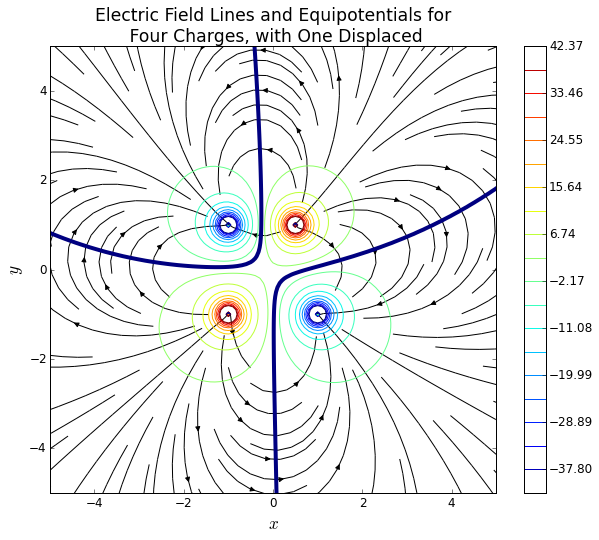

In [ ]:
# Extension 1
qr = []
qr.append((0.5, 1.0, 1.0))
qr.append((-1.0, 1.0, -1.0))
qr.append((-1.0, -1.0, 1.0))
qr.append((1.0, -1.0, -1.0))
Plots(qr, title = "Electric Field Lines and Equipotentials for\n Four Charges, with One Displaced")

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


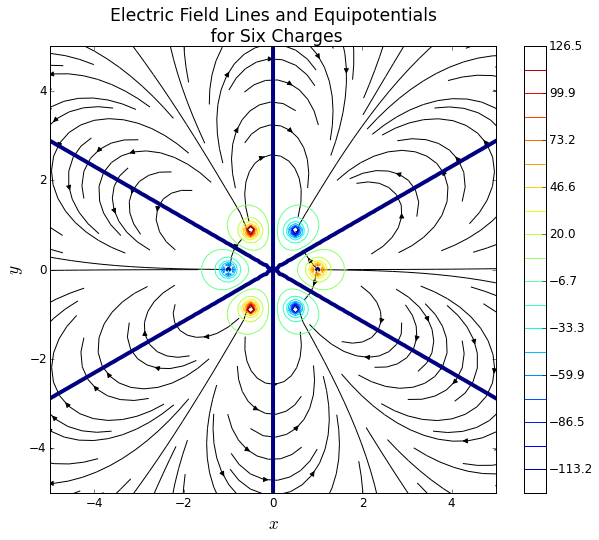

In [ ]:
# Extension 2
qr = []
Nq = 6
for n in range(0, Nq):
    xn = numpy.cos(2.0*numpy.pi * n / Nq)
    yn = numpy.sin(2.0*numpy.pi * n / Nq)
    qn = (-1)**n
    qr.append((xn, yn, qn))
Plots(qr, title = "Electric Field Lines and Equipotentials\n for Six Charges")